In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 22.1 MB/s eta 0:00:00


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=aaf05365b43b3a42dfb9ae5eb059265d7c112b571c929e9258a081e513524623
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/telco-customer-churn.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for NaN values
nan_values = df.isna().sum()

# Output the results
print(f"Missing values:\n{missing_values}\n")
print(f"NaN values:\n{nan_values}")

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NaN values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Convert 'TotalCharges' to numeric (this column can have non-numeric entries that need cleaning)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**OUTLIERS**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

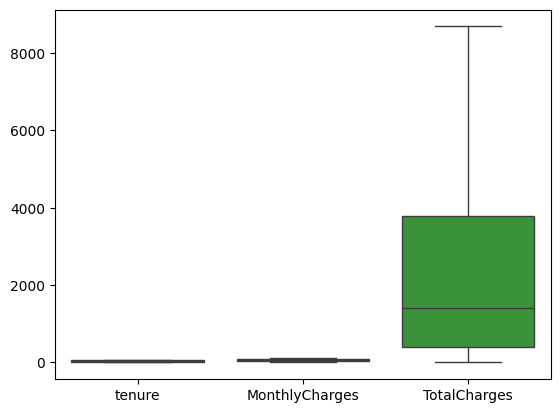

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

**DATA TYPES**

In [ ]:
# List all data types
df.dtypes

# Separate features by type
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**`FEATURE IMPORTANCE`**

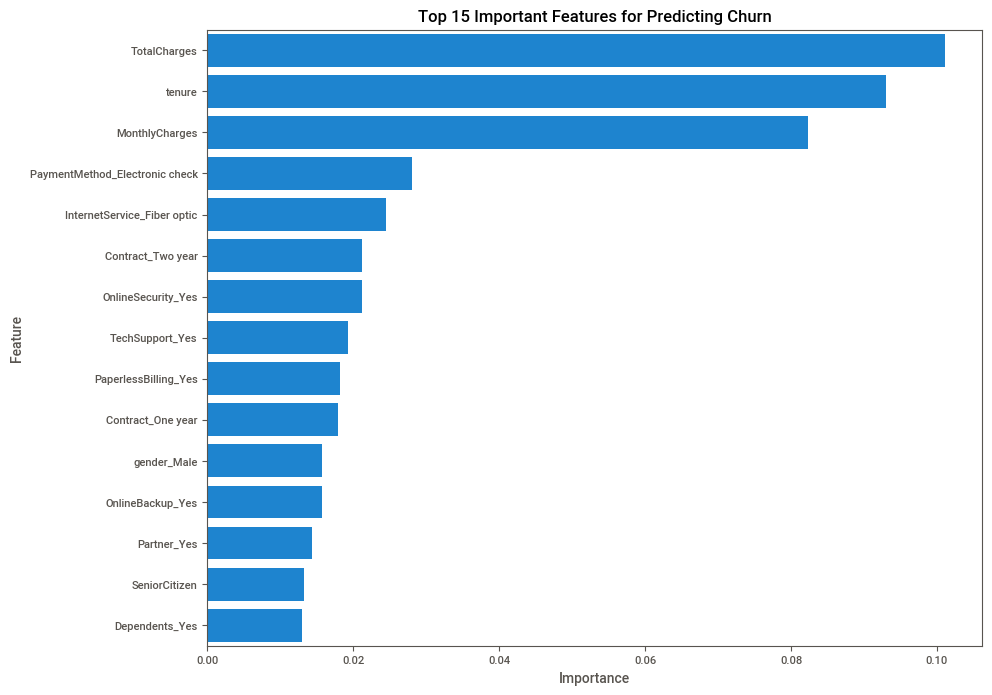

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df.drop(columns='Churn')
y = df['Churn']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Important Features for Predicting Churn')
plt.show()


**EDA**

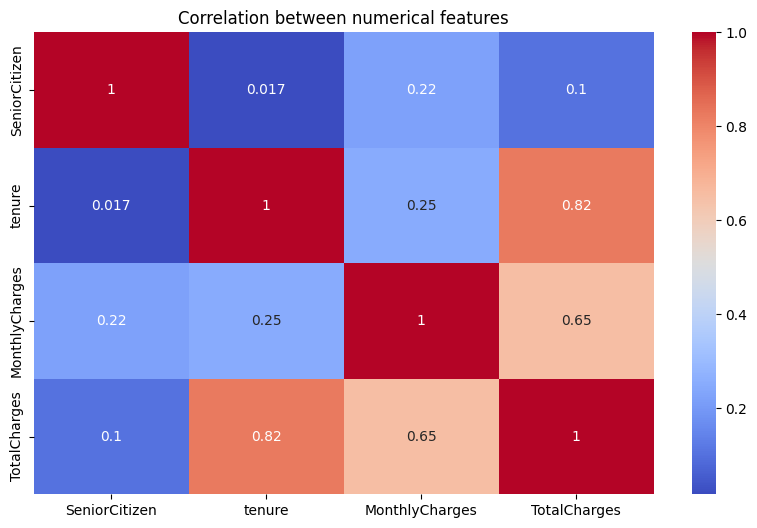

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()


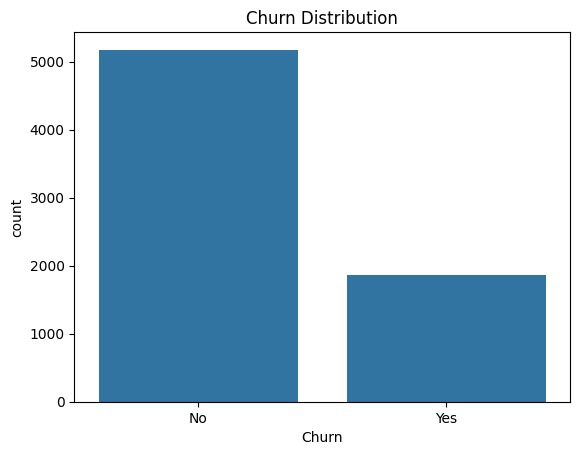

In [ ]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

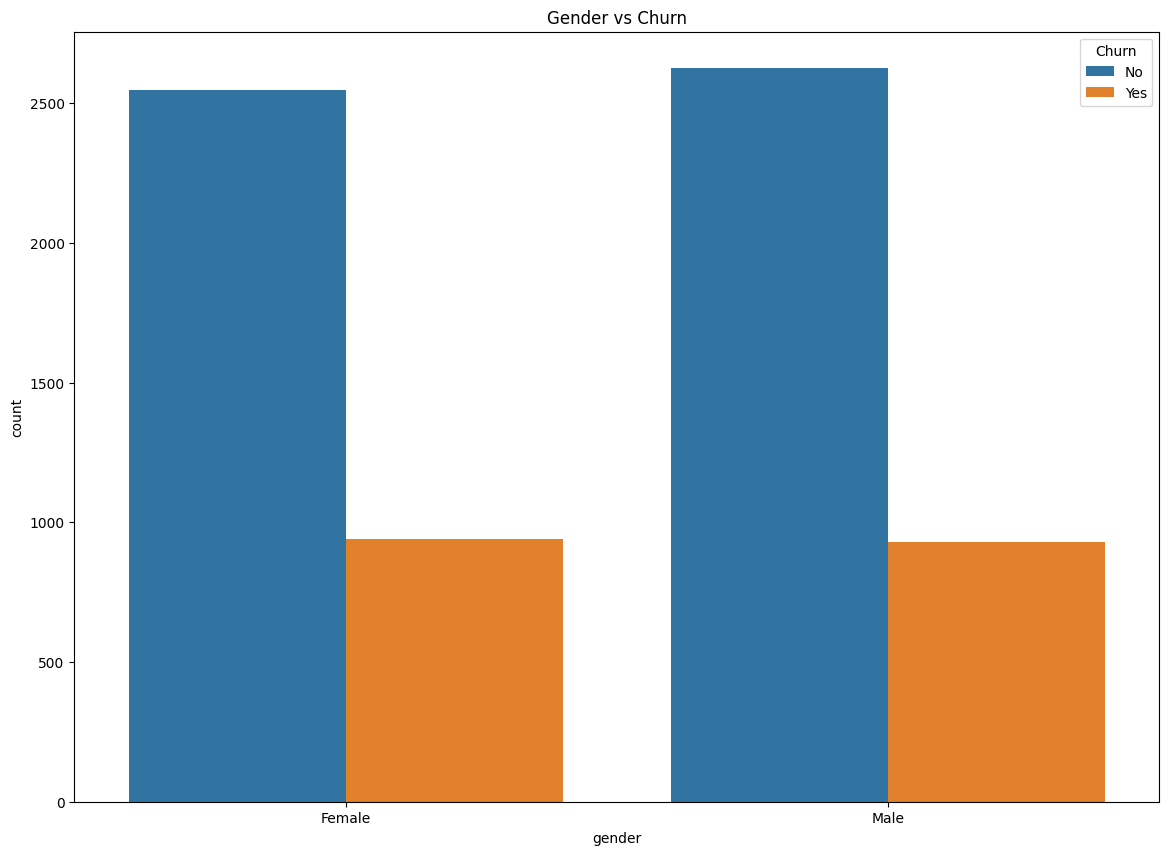

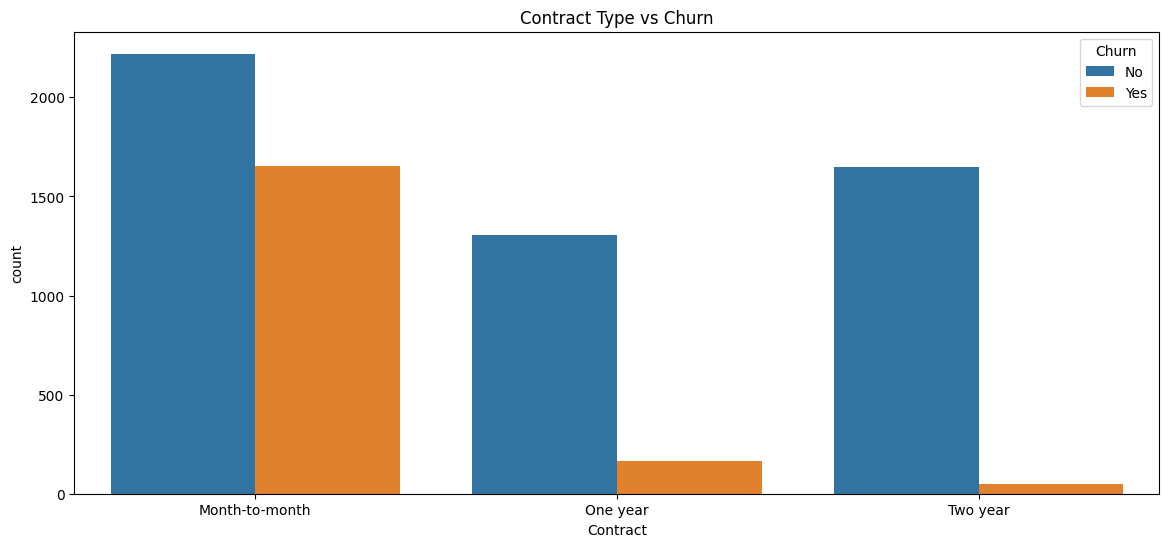

In [ ]:
# Plot churn against some categorical features
plt.figure(figsize=(14, 10))

# Gender vs Churn
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')

# Contract vs Churn
plt.figure(figsize=(14, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()


<ipython-input-2-a32104479a6e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


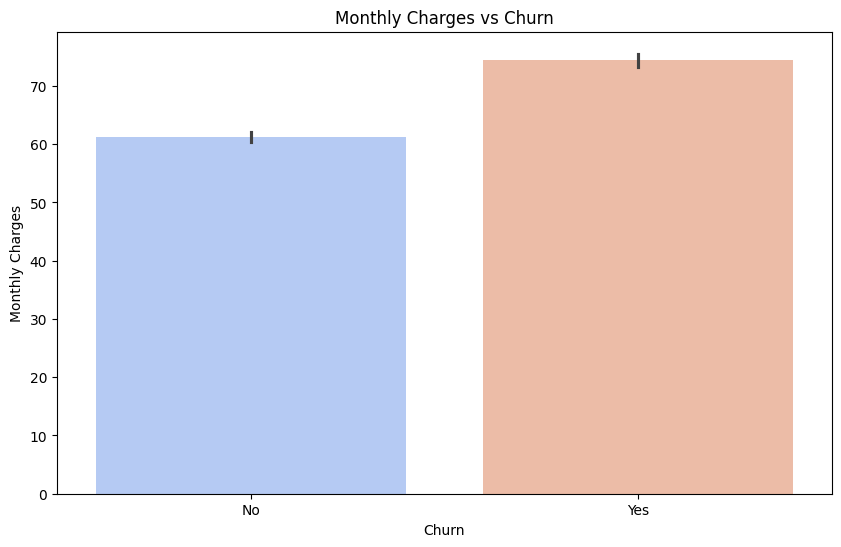

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('/content/telco-customer-churn.csv')
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


In [ ]:
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
def object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df.series=LabelEncoder().fit_transform(df[column])
    return df

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

def object_to_numeric(df):
    """
    Converts object columns in a DataFrame to numeric.

    Args:
        df (pd.DataFrame): The DataFrame to convert.

    Returns:
        pd.DataFrame: The converted DataFrame.
    """
    for column in df.select_dtypes(include=['object']).columns: # Iterate only through object columns
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

df = object_to_numeric(df) # Apply function to the entire DataFrame


**Split the dataset into training and test datasets (80/20 ratio)**

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the 'Churn' column as binary (Yes -> 1, No -> 0)
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# One-hot encode other categorical variables, drop the first category to avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns='Churn')  # Drop the 'Churn' column from features
y = df_encoded['Churn']  # This is now the binary target column

# Split dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 32) (1409, 32) (5634,) (1409,)


In [ ]:
import pandas_profiling

# Generate Pandas Profiling report
profile = pandas_profiling.ProfileReport(df)
profile.to_file('Churn_Pandas_Profiling_Report.html')


<ipython-input-28-ca57662ff307>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html("sweetviz_report.html")

print("Reports generated successfully!")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Reports generated successfully!


In [ ]:
# ... other imports and code ...
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load your data into a DataFrame called 'df'
# For example, if your data is in a CSV file called 'telecom_churn.csv':
df = pd.read_csv('/content/telco-customer-churn.csv')

# Encode the 'Churn' column as binary (Yes -> 1, No -> 0)
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# One-hot encode other categorical variables, drop the first category to avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns='Churn')  # Drop the 'Churn' column from features
y = df_encoded['Churn']  # This is now the binary target column

# Split dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the 'models' dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    # ... add other models as needed
}

# ... your existing code ...

def evaluate_model(y_true, y_pred):
    # ... (your existing evaluate_model function) ...
    pass # Add a 'pass' statement to indicate an empty function body

print("Performance on Original Dataset")
original_results = {}
for name, model in models.items():  # Now 'models' is defined
    model.fit(X_train, y_train)

Performance on Original Dataset


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("/content/telco-customer-churn.csv")

**Training data and testing data percentages**

In [ ]:

# Print the split percentages
print(f"Training data percentage: {(len(X_train) / len(X)) * 100:.2f}%")
print(f"Testing data percentage: {(len(X_test) / len(X)) * 100:.2f}%")


Training data percentage: 79.99%
Testing data percentage: 20.01%


**Data Preprocessing**

Encoding Target Variable


In [29]:
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])


One-Hot Encoding Categorical Variables



In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)


Splitting Features and Target Variable



In [31]:
X = df_encoded.drop(columns='Churn')  # Features
y = df_encoded['Churn']  # Target variable


Train-Test Split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**SMOTE for Imbalanced Data**

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have your features (X) and target (y) prepared
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

**Model Training and Evaluation on Original Data**

In [ ]:
print("Evaluation on Original Data")
original_scores = {}
for model_name, model in models.items():
    original_scores[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{model_name}: {original_scores[model_name]}")


Evaluation on Original Data
Naive Bayes: {'Accuracy': 0.27963094393186655, 'Precision': 0.2586466165413534, 'Recall': 0.9222520107238605, 'F1-Score': 0.40399295361127424}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: {'Accuracy': 0.8090844570617459, 'Precision': 0.652046783625731, 'Recall': 0.5978552278820375, 'F1-Score': 0.6237762237762238}
Random Forest: {'Accuracy': 0.801277501774308, 'Precision': 0.7030567685589519, 'Recall': 0.4316353887399464, 'F1-Score': 0.5348837209302325}
XGBoost: {'Accuracy': 0.78708303761533, 'Precision': 0.6166134185303515, 'Recall': 0.517426273458445, 'F1-Score': 0.5626822157434402}


***Evaluating Models on SMOTE Data***

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Evaluate on SMOTE Data
print("\nEvaluation on SMOTE Data")
smote_scores = {}
for model_name, model in models.items():
    smote_scores[model_name] = evaluate_model(model, X_train_smote, X_test, y_train_smote, y_test)
    print(f"{model_name}: {smote_scores[model_name]}")


Evaluation on SMOTE Data
Naive Bayes: {'Accuracy': 0.27963094393186655, 'Precision': 0.2586466165413534, 'Recall': 0.9222520107238605, 'F1-Score': 0.40399295361127424}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: {'Accuracy': 0.7955997161107168, 'Precision': 0.6115485564304461, 'Recall': 0.6246648793565683, 'F1-Score': 0.6180371352785146}
Random Forest: {'Accuracy': 0.8168914123491838, 'Precision': 0.6780185758513931, 'Recall': 0.5871313672922251, 'F1-Score': 0.6293103448275862}
XGBoost: {'Accuracy': 0.7934705464868701, 'Precision': 0.6040609137055838, 'Recall': 0.6380697050938338, 'F1-Score': 0.6205997392438071}


**`Hyperparameter Tuning`**

In [ ]:
# Hyperparameters for Naive Bayes
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Hyperparameters for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Hyperparameters for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameters for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='recall')
grid_search_rf.fit(X_train_smote, y_train_smote)
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Recall Score:", grid_search_rf.best_score_)



Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best Recall Score: 0.8547547231943614


In [27]:
# Assuming evaluate_model expects (model, X, y)
def evaluate_model(model, X, y):
    """
    Evaluates a model's performance using accuracy, precision, recall, and F1-score.

    Args:
        model: The trained machine learning model.
        X: The feature data for evaluation.
        y: The target variable data for evaluation.

    Returns:
        A tuple containing accuracy, precision, recall, and F1-score.
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    return accuracy, precision, recall, f1

# Update the call to evaluate_model to use only the required arguments:
best_rf = grid_search_rf.best_estimator_
# Evaluate the model on the test set
final_scores_rf = evaluate_model(best_rf, X_test, y_test)
print("Final Evaluation of Tuned Random Forest:", final_scores_rf)

Final Evaluation of Tuned Random Forest: (0.7061745919091554, 0.47050359712230216, 0.8766756032171582, 0.6123595505617978)


In [ ]:


# Adjusting the tune_model function to prioritize recall
def tune_model(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_


**Visualizing Hyperparameter Tuning Results**

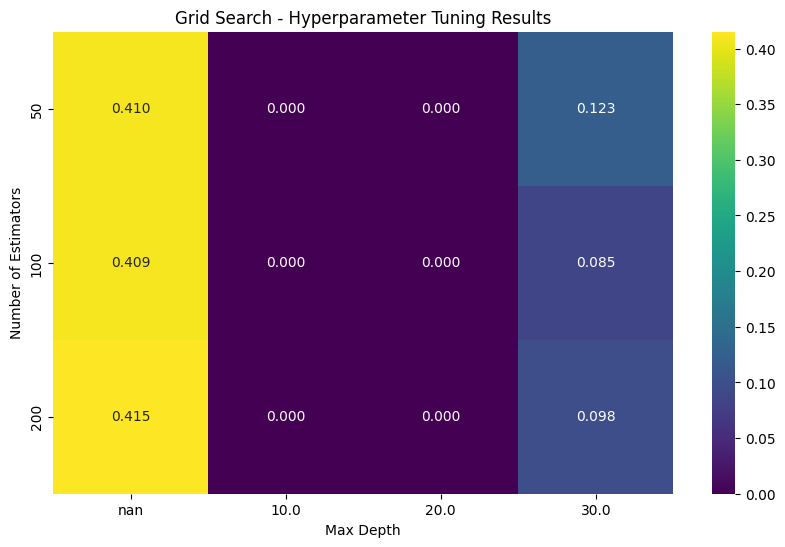

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_grid_search_results(grid_search):
    # Create a DataFrame with the results
    results = pd.DataFrame(grid_search.cv_results_)

    # Pivot the DataFrame for heatmap plotting
    # The pivot method expects keyword arguments for index, columns, and values
    heatmap_data = results.pivot(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".3f")
    plt.title("Grid Search - Hyperparameter Tuning Results")
    plt.xlabel("Max Depth")
    plt.ylabel("Number of Estimators")
    plt.show()

# Example for Random Forest hyperparameter tuning
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring='recall', cv=5)
grid_search_rf.fit(X_train, y_train)

# Plot the grid search results
plot_grid_search_results(grid_search_rf)

**Summary of Results**

In [28]:
print("\nSummary of Original vs SMOTE Scores:")
for model_name in models.keys():
    print(f"{model_name} - Original: {original_scores[model_name]}, SMOTE: {smote_scores[model_name]}")



Summary of Original vs SMOTE Scores:
Naive Bayes - Original: {'Accuracy': 0.27963094393186655, 'Precision': 0.2586466165413534, 'Recall': 0.9222520107238605, 'F1-Score': 0.40399295361127424}, SMOTE: {'Accuracy': 0.27963094393186655, 'Precision': 0.2586466165413534, 'Recall': 0.9222520107238605, 'F1-Score': 0.40399295361127424}
Logistic Regression - Original: {'Accuracy': 0.8090844570617459, 'Precision': 0.652046783625731, 'Recall': 0.5978552278820375, 'F1-Score': 0.6237762237762238}, SMOTE: {'Accuracy': 0.7955997161107168, 'Precision': 0.6115485564304461, 'Recall': 0.6246648793565683, 'F1-Score': 0.6180371352785146}
Random Forest - Original: {'Accuracy': 0.801277501774308, 'Precision': 0.7030567685589519, 'Recall': 0.4316353887399464, 'F1-Score': 0.5348837209302325}, SMOTE: {'Accuracy': 0.8168914123491838, 'Precision': 0.6780185758513931, 'Recall': 0.5871313672922251, 'F1-Score': 0.6293103448275862}
XGBoost - Original: {'Accuracy': 0.78708303761533, 'Precision': 0.6166134185303515, 'R

In [36]:
!pip install sweetviz
import sweetviz as sv # Import the sweetviz library and assign it to the alias 'sv'
import pandas as pd

sweet_report = sv.analyze(df)
sweet_report.show_html("sweetviz_report.html")

print("Reports generated successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Reports generated successfully!


In [38]:
!pip install ydata-profiling # Install the pandas_profiling library using pip.

import ydata_profiling as pandas_profiling # Import the library after installing it.

# Generate Pandas Profiling report
profile = pandas_profiling.ProfileReport(df)
profile.to_file('Churn_Pandas_Profiling_Report.html')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ddeba88a447e79ce5e2aa81a1e1edbfda88e92677d36a71d65fcfe5e9ab03f9d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]